# Evaluación de fuerza de cartas de los superamigos por simulación

Las cartas de los superamigos son un juego en el que mediante selección de ciertas características de las cartas, se ralizan combates. La carta con el valor más alto es la ganadora. La pregunta es ¿Cuáles son las mejores cartas?

Una posibilidad para contestar esta pregunta es, si conocemos como es la distribución de cada variable, se podría rankear a cada carta. Como resultado obtendríamos que tan buena es cada carta en una "disciplina" determinada. Con estos rankings podríamos construir un ranking general como combinación de todas ellas. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 10]
%matplotlib inline

In [6]:
f = pd.read_csv('/Users/dbikiel/Dropbox/proyectos de programacion/cartas superamigos/listado_DC.csv')

La lista de las cartas se puede ver a continuación

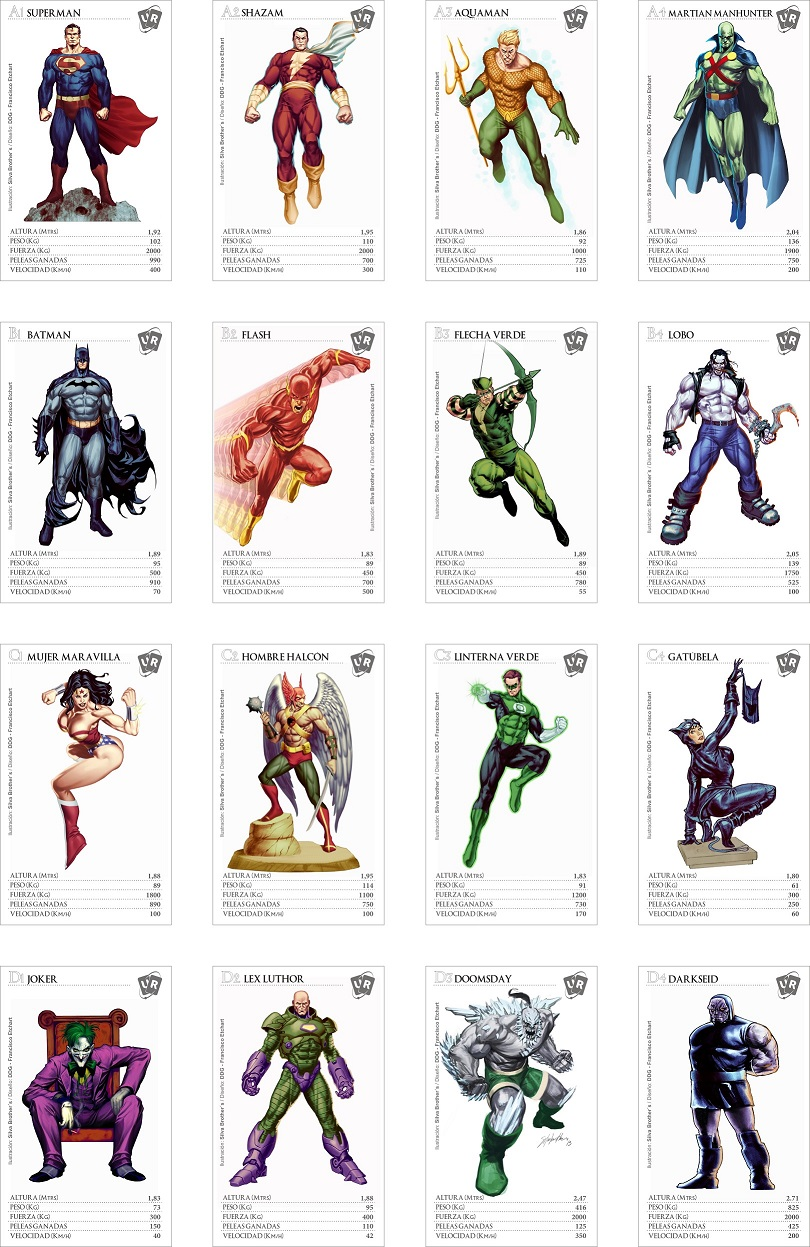

In [10]:
Image("DC1.jpg")

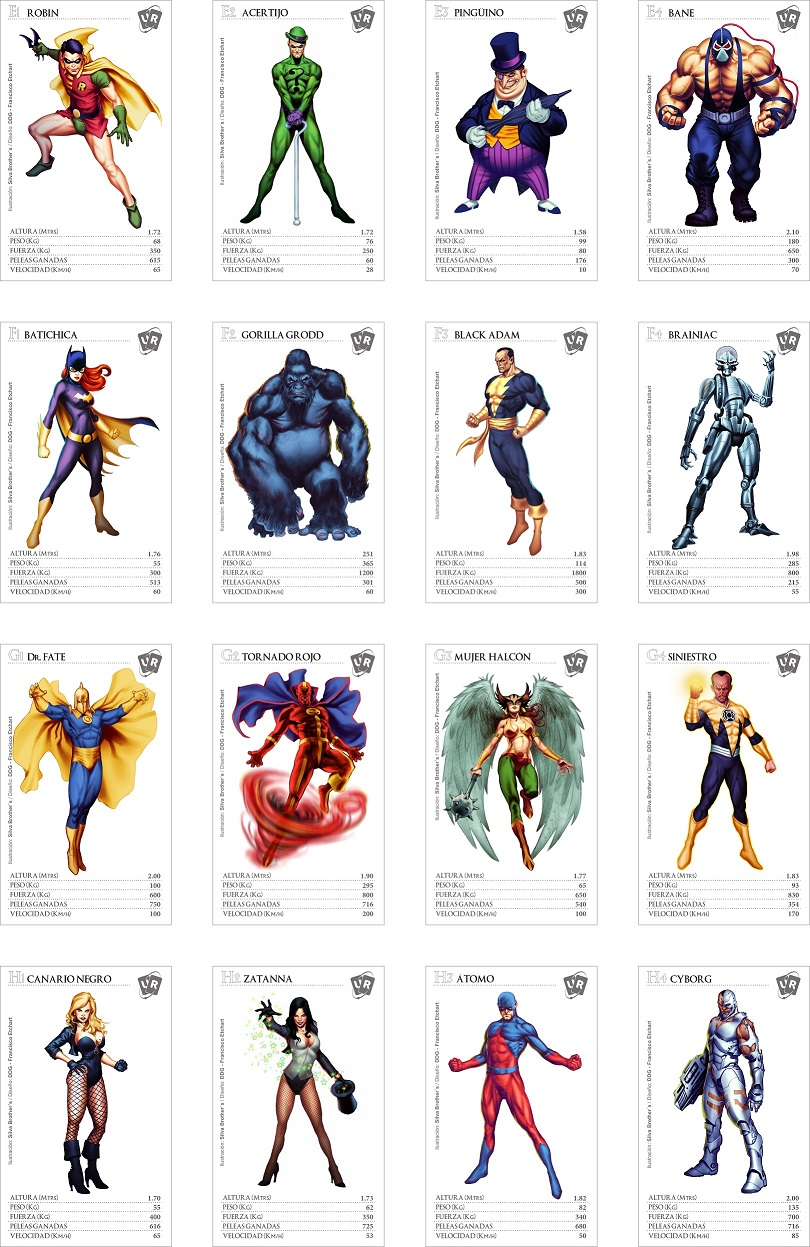

In [11]:
Image("DC2.jpg")

In [183]:
f

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD
0,A,1,Superman,1.92,102,2000,990,400
1,A,2,Shazam,1.95,110,2000,700,300
2,A,3,Aquaman,1.86,92,1000,725,110
3,A,4,Martian Manhunter,2.04,136,1900,750,200
4,B,1,Batman,1.89,95,500,910,70
5,B,2,Flash,1.83,89,450,700,500
6,B,3,Flecha Verde,1.89,89,450,780,55
7,B,4,Lobo,2.05,139,1750,525,100
8,C,1,Mujer Maravilla,1.88,89,1800,890,100
9,C,2,Hombre Halcon,1.95,114,1100,750,100


Para construir el ranking de cada variable y el ranking general, normalizamos todas las variables a través de los valores máximos y mínimos. De esta forma cada variable tiene un rango que va de 0.0 para la peor carta en esa variable a 1.0 para la mejor.

In [184]:
f_norm = copy.copy(f)
f_norm.ALTURA = (f.ALTURA - np.min(f.ALTURA))/(np.max(f.ALTURA - np.min(f.ALTURA)))
f_norm.PESO = (f.PESO - np.min(f.PESO))/(np.max(f.PESO - np.min(f.PESO)))
f_norm.FUERZA = (f.FUERZA - np.min(f.FUERZA))/(np.max(f.FUERZA - np.min(f.FUERZA)))
f_norm.PELEAS = (f.PELEAS - np.min(f.PELEAS))/(np.max(f.PELEAS - np.min(f.PELEAS)))
f_norm.VELOCIDAD = (f.VELOCIDAD - np.min(f.VELOCIDAD))/(np.max(f.VELOCIDAD - np.min(f.VELOCIDAD)))

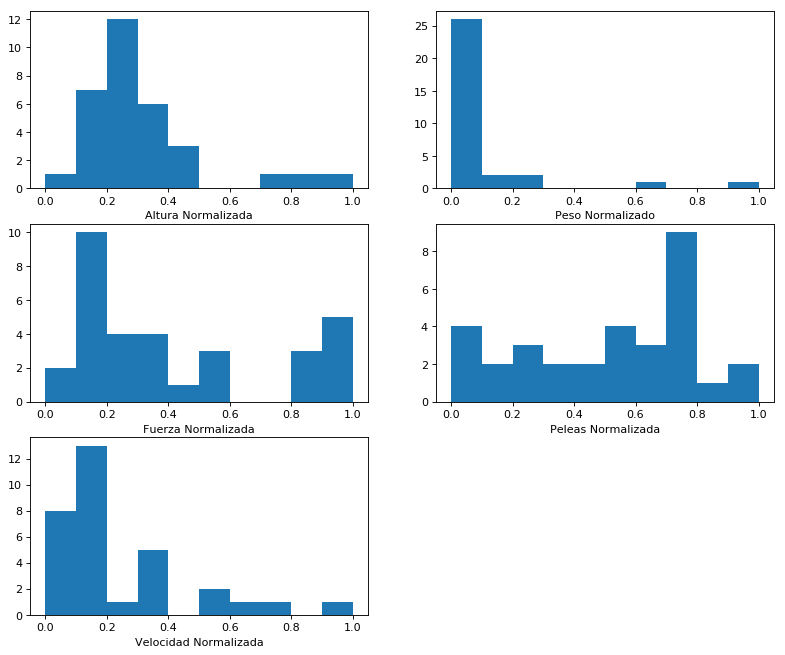

In [185]:
fig = plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(3,2,1)
plt.hist(f_norm.ALTURA)
plt.xlabel('Altura Normalizada')
plt.subplot(3,2,2)
plt.hist(f_norm.PESO)
plt.xlabel('Peso Normalizado')
plt.subplot(3,2,3)
plt.hist(f_norm.FUERZA)
plt.xlabel('Fuerza Normalizada')
plt.subplot(3,2,4)
plt.hist(f_norm.PELEAS)
plt.xlabel('Peleas Normalizada')
plt.subplot(3,2,5)
plt.hist(f_norm.VELOCIDAD)
plt.xlabel('Velocidad Normalizada')
plt.show()

Se puede observar que en cada variable hay algunas cartas con caracteristicas superiores a las demas. Se puede obtener una idea general con estos rankings? Por ejemplo, que pasaría si construimos una nueva variabla llamada SUMA que sea la suma de los 5 rankings.

In [186]:
SUMA = f_norm.ALTURA + f_norm.PESO + f_norm.FUERZA + f_norm.PELEAS + f_norm.VELOCIDAD

In [187]:
f_norm['SUMA'] = SUMA

In [188]:
f_norm.sort_values(by= 'SUMA', ascending= False)

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA
15,D,4,Darkseid,1.000000,0.601562,1.000000,0.392473,0.387755,3.381791
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522
14,D,3,Doomsday,0.787611,0.282031,1.000000,0.069892,0.693878,2.833412
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411
31,H,4,Cyborg,0.371681,1.000000,0.322917,0.705376,0.153061,2.553036
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968
8,C,1,Mujer Maravilla,0.265487,0.026562,0.895833,0.892473,0.183673,2.264029
22,F,3,Black Adam,0.221239,0.046094,0.895833,0.473118,0.591837,2.228121
5,B,2,Flash,0.221239,0.026562,0.192708,0.688172,1.000000,2.128682
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019


Con este nuevo ranking podemos ordenar las cartas. ¿Cómo es la distribución de SUMA?

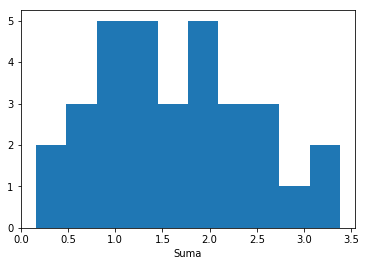

In [189]:
plt.hist(f_norm.SUMA)
plt.xlabel('Suma')
plt.show()

El problema de usar suma como indicador de la fuerza total de una de las cartas es que en un combate en particular se utiliza una única de las variables. Más aun, no importa el valor de la misma, sólo cual es mayor. Dicho esto, en realidad sólo importa la posición en el ranking normalizado y no el valor. Por ejemplo, es claro que Superman y Darkseid son cartas poderosas porque en dos de las categorías tienen los valores más altos y por lo tanto le ganan a todas las cartas en 2 de 5 variables. Por otro lado, el pingüino es la peor carta porque en dos de las 5 variables es la peor carta.

Una cosa que podríamos hacer es en vez de sumar el valor normalizado, sumar la posición del ranking. Por ejemplo, si ordenamos peleas:

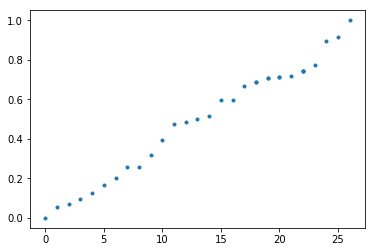

In [190]:
peleas = list(f_norm['PELEAS'])
peleas_ranking = list(map({j: i for i, j in enumerate(sorted(set(peleas)))}.get, peleas))
plt.plot(peleas_ranking,peleas,'.')
plt.show()

In [191]:
altura = list(f_norm['ALTURA'])
altura_ranking = list(map({j: i for i, j in enumerate(sorted(set(altura)))}.get, altura))
peso = list(f_norm['PESO'])
peso_ranking = list(map({j: i for i, j in enumerate(sorted(set(peso)))}.get, peso))
fuerza = list(f_norm['FUERZA'])
fuerza_ranking = list(map({j: i for i, j in enumerate(sorted(set(fuerza)))}.get, fuerza))
velocidad = list(f_norm['VELOCIDAD'])
velocidad_ranking = list(map({j: i for i, j in enumerate(sorted(set(velocidad)))}.get, velocidad))
ranking = np.array(altura_ranking) + np.array(peso_ranking) + np.array(fuerza_ranking) + np.array(peleas_ranking) + np.array(velocidad_ranking)

f_norm['RANKING'] = ranking

Usando la nueva variable RANKING, podemos ver como se relaciona con SUMA. Nuevamente, cuanto mayor es la variable RANKING, mayor es la fuerza de la carta.

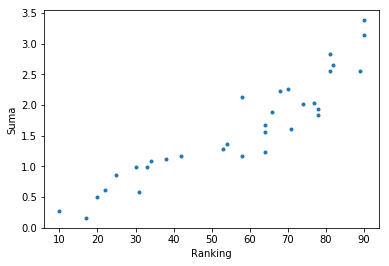

In [192]:
plt.plot(f_norm.RANKING, f_norm.SUMA,'.')
plt.xlabel('Ranking')
plt.ylabel('Suma')
plt.show()

Otra forma de evaluar la fuerza de una carta, es simular el combate de las mismas. Para ello, construimos una función fight, que dada la base de datos de las cartas y dos cartas al azar, elige al azar una de las variables de las cartas y devuelve [1.0, 0.0] si la primera carta es la ganadora, [0.0 , 1.0]  si es la segunda o [0.5, 0.5] si hay empate.

In [193]:
def fight(database, card1, card2):
    variable = random.choice(['ALTURA','PESO','FUERZA','PELEAS','VELOCIDAD'])
    v1 = database.loc[card1,variable]
    v2 = database.loc[card2,variable]   
    if v1 > v2:
        return [1,0]
    elif v1 < v2:
        return [0,1]
    else:
        return [0.5, 0.5]
    return v1, v2

Para simular los combates y que haya igual combates para todas las cartas, dividimos el mazo en dos en forma aleatoria y repetimos los 16 posibles combates reps = 10000 veces. Cada combate modifica el valor de una variable POINTS en la base de datos. Al finalizar las repeticiones, divide POINTS por la cantidad de combates realizados, con lo que POINTS pasa a ser una especie de probabilidad de triunfo de cada carta.

In [194]:
f_norm['POINTS'] = 0.0
reps = 10000
for i in range(reps):
    cartas = np.arange(32)
    random.shuffle(cartas)
    partida = cartas.reshape(16,2)
    for j in range(16):
        v1, v2 = fight(f_norm,partida[j][0],partida[j][1])
        f_norm.loc[partida[j][0],'POINTS'] = f_norm.loc[partida[j][0],'POINTS'] + v1
        f_norm.loc[partida[j][1],'POINTS'] = f_norm.loc[partida[j][1],'POINTS'] + v2

f_norm['POINTS'] = f_norm['POINTS']/reps    

Podemos ver si nuestra función de ranking refleja lo obtenido en las simulaciones

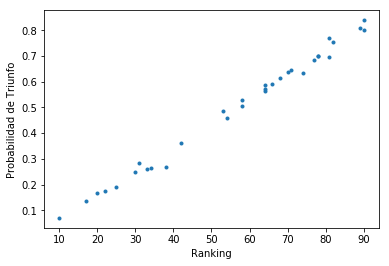

In [195]:
plt.plot(f_norm.RANKING, f_norm.POINTS,'.')
plt.xlabel('Ranking')
plt.ylabel('Probabilidad de Triunfo')
plt.show()

Como puede observarse, la función de ranking describe bastante bien la probabilidad de triunfo de cada carta.

In [196]:
f_norm.sort_values(by = 'POINTS',ascending= False)

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,POINTS
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,0.83895
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,0.81045
15,D,4,Darkseid,1.000000,0.601562,1.000000,0.392473,0.387755,3.381791,90,0.80250
14,D,3,Doomsday,0.787611,0.282031,1.000000,0.069892,0.693878,2.833412,81,0.76880
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411,82,0.75245
25,G,2,Tornado Rojo,0.283186,0.187500,0.375000,0.705376,0.387755,1.938817,78,0.69940
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,0.69840
31,H,4,Cyborg,0.371681,1.000000,0.322917,0.705376,0.153061,2.553036,81,0.69530
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019,77,0.68485
24,G,1,Dr. Fate,0.371681,0.035156,0.270833,0.741935,0.183673,1.603280,71,0.64430


Ahora vamos a construir una función para simular un partido entre dos jugadores. Para ello, mezclaremos las cartas y repartiremos la mitad a cada jugador. El jugador que tenga A1 comenzará y elegirá (al azar) una de las variables. Si gana, se lleva ambas cartas y las pone en el fondo de su mazo. El partido dura hasta que uno de los jugadores se queda sin cartas. Si hay empate, se elige un ganador al azar.

In [18]:
def mezclar(n):
    cartas = np.arange(n)
    random.shuffle(cartas)
    return cartas.reshape(int(n/2),2)

Dado que el juego es completamente al azar, vamos a evaluar la ventaja de tener la carta A1. En este caso, el jugador con A1 se convierte en el jugador 1.

In [161]:
def partido(empieza_A1):
    mazos = mezclar(32)
    
    if empieza_A1:
        if 0 in mazos[:,0]:
            mazo1 = list(mazos[:,0])
            mazo2 = list(mazos[:,1])
        else:
            mazo1 = list(mazos[:,1])
            mazo2 = list(mazos[:,0])
    else:
        if random.random() < 0.5:
            mazo1 = list(mazos[:,0])
            mazo2 = list(mazos[:,1])
        else:
            mazo1 = list(mazos[:,1])
            mazo2 = list(mazos[:,0])        
    
    fin_partida = len(mazo1)*len(mazo2)
    
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        v1, v2 = fight(f_norm,carta1,carta2)
        
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
            else:
                mazo2 = [carta1, carta2] + mazo2
    
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido(True))
print('Empieza el jugador 1 y tiene A1:', list(np.sum(np.array(juegos), axis=0)/rep))

juegos = []
for i in range(rep):
    juegos.append(partido(False))
print('Empieza el jugador 1:', list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 y tiene A1: [0.5535, 0.4465]
Empieza el jugador 1: [0.4965, 0.5035]


Dado que los jugadores eligen aleatoriamente la variable, empezar no deberia dar una ventaja. Al parecer, tener A1 si da una pequeña ventaja jugando aleatoriamente.

Construyamos un jugador que juegue óptimamente, en vez de al azar. Para ello, este jugador sabe exactamente cual de las 5 variables es la mejor para cada carta.

In [197]:
variables = ['ALTURA','PESO','FUERZA','PELEAS','VELOCIDAD']
MEJOR = []
for i in range(32):
    tmp = np.array(f_norm.loc[i][3:8])
    MEJOR.append(variables[np.argmax(tmp)])

#Superman es el mejor absoluto en peleas y Darkseid en altura
MEJOR[0] = 'PELEAS'
MEJOR[15] = 'ALTURA'
f_norm['MEJOR'] = MEJOR

In [198]:
f_norm.sort_values(by = 'POINTS', ascending= False)

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,POINTS,MEJOR
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,0.83895,PELEAS
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,0.81045,FUERZA
15,D,4,Darkseid,1.000000,0.601562,1.000000,0.392473,0.387755,3.381791,90,0.80250,ALTURA
14,D,3,Doomsday,0.787611,0.282031,1.000000,0.069892,0.693878,2.833412,81,0.76880,FUERZA
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411,82,0.75245,FUERZA
25,G,2,Tornado Rojo,0.283186,0.187500,0.375000,0.705376,0.387755,1.938817,78,0.69940,PELEAS
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,0.69840,PELEAS
31,H,4,Cyborg,0.371681,1.000000,0.322917,0.705376,0.153061,2.553036,81,0.69530,PESO
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019,77,0.68485,FUERZA
24,G,1,Dr. Fate,0.371681,0.035156,0.270833,0.741935,0.183673,1.603280,71,0.64430,PELEAS


In [129]:
def fight_optimo(database, card1, card2, jugador):
    if jugador == 0:
        variable = database.loc[card1,'MEJOR']
    else:
        variable = database.loc[card2,'MEJOR']   
        
    v1 = database.loc[card1,variable]
    v2 = database.loc[card2,variable]   
    if v1 > v2:
        return [1,0]
    elif v1 < v2:
        return [0,1]
    else:
        return [0.5, 0.5]
    return v1, v2

In [163]:
def partido_optimo_vs_azar():
    mazos = mezclar(32)
        
    if 0 in mazos[:,0]:
        mazo1 = list(mazos[:,0])
        mazo2 = list(mazos[:,1])
    else:
        mazo1 = list(mazos[:,1])
        mazo2 = list(mazos[:,0])
    
    fin_partida = len(mazo1)*len(mazo2)
    
    #Empieza el jugador 1, que juega optimamente
    turno = 0
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        if turno == 0:
            v1, v2 = fight_optimo(f_norm,carta1,carta2,turno)
        else:
            v1, v2 = fight(f_norm,carta1,carta2)
            
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
            turno = 0
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
            turno = 1
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
                turno = 0
            else:
                mazo2 = [carta1, carta2] + mazo2
                turno = 1
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_azar())
print('Empieza el jugador 1 con A1 optimamente :', list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 con A1 optimamente : [0.9993, 0.0007]


Si el jugador que empieza juega óptimamente, gana el 99.9% de las veces.

In [164]:
def partido_optimo_vs_azar2():
    mazos = mezclar(32)
        
    if 0 in mazos[:,0]:
        mazo1 = list(mazos[:,0])
        mazo2 = list(mazos[:,1])
    else:
        mazo1 = list(mazos[:,1])
        mazo2 = list(mazos[:,0])
    
    fin_partida = len(mazo1)*len(mazo2)
    
    #Empieza el jugador 2, que juega al azar
    turno = 0
    
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        if turno == 0:
            v1, v2 = fight(f_norm,carta1,carta2)
        else:
            v1, v2 = fight_optimo(f_norm,carta1,carta2,turno)
            
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
            turno = 0
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
            turno = 1
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
                turno = 0
            else:
                mazo2 = [carta1, carta2] + mazo2
                turno = 1
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_azar2())
print('Empieza el jugador 1 con A1 al azar :',list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 con A1 al azar : [0.0042, 0.9958]


La ventaja de tener A1 es mínima, si el jugador juega al azar contra otro que juega óptimamente.

In [169]:
def partido_optimo_vs_optimo(empieza_A1):
    mazos = mezclar(32)
        
    if empieza_A1:
        if 0 in mazos[:,0]:
            mazo1 = list(mazos[:,0])
            mazo2 = list(mazos[:,1])
        else:
            mazo1 = list(mazos[:,1])
            mazo2 = list(mazos[:,0])
    else:
        if random.random() < 0.5:
            mazo1 = list(mazos[:,0])
            mazo2 = list(mazos[:,1])
        else:
            mazo1 = list(mazos[:,1])
            mazo2 = list(mazos[:,0])

    fin_partida = len(mazo1)*len(mazo2)
    
    #Empieza el jugador 1, que juega optimamente
    turno = 0
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        v1, v2 = fight_optimo(f_norm,carta1,carta2,turno)
            
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
            turno = 0
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
            turno = 1
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
                turno = 0
            else:
                mazo2 = [carta1, carta2] + mazo2
                turno = 1
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_optimo(True))
print('Empieza el jugador 1 y tiene A1: ', list(np.sum(np.array(juegos), axis=0)/rep))

juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_optimo(False))
print('Empieza el Jugador 1: ', list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 y tiene A1:  [0.6952, 0.3048]
Empieza el Jugador 1:  [0.5623, 0.4377]


Si ambos juegan óptimamente, el jugador que tiene la carta A1 tiene ventaja (porque es la mejor y porque empieza). Jugando óptimamente, empezar otorga una ventaja. Si además se tiene la mejor carta, la ventaja es mayor.

# Matrices de victorias por variable

Otra forma de evaluar cada carta es determinando la cantidad de cartas a las que les gana, pierde o empata en cada variable.

In [316]:
def victorias_empates_derrotas(database,card,variable):
    v = 0
    e = 0
    d = 0
    for i in range(32):
        if database.iloc[i][variable] != database.iloc[card][variable]:
            if database.iloc[i][variable] < database.iloc[card][variable]:
                v += 1
            elif database.iloc[i][variable] > database.iloc[card][variable]:
                d += 1
            else:
                e += 1
    return [v,e,d]

def indice_variable(ved):
    return (ved[0] - ved[1] + 0.5*ved[2])/31

In [319]:
indice_altura = []
indice_peso = []
indice_fuerza = []
indice_peleas = []
indice_velocidad = []
for i in range(32):
    indice_altura.append(indice_variable(victorias_empates_derrotas(f_norm,i,'ALTURA')))
    indice_peso.append(indice_variable(victorias_empates_derrotas(f_norm,i,'PESO')))
    indice_fuerza.append(indice_variable(victorias_empates_derrotas(f_norm,i,'FUERZA')))
    indice_peleas.append(indice_variable(victorias_empates_derrotas(f_norm,i,'PELEAS')))
    indice_velocidad.append(indice_variable(victorias_empates_derrotas(f_norm,i,'VELOCIDAD')))

In [320]:
f_norm['I_ALTURA'] = indice_altura
f_norm['I_PESO'] = indice_peso
f_norm['I_FUERZA'] = indice_fuerza
f_norm['I_PELEAS'] = indice_peleas
f_norm['I_VELOCIDAD'] = indice_velocidad

In [322]:
f_norm.sort_values(by = 'I_PELEAS', ascending=False)

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,POINTS,MEJOR,I_ALTURA,I_PESO,I_FUERZA,I_PELEAS,I_VELOCIDAD
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,0.83895,PELEAS,0.822581,0.806452,0.903226,1.000000,0.983871
4,B,1,Batman,0.274336,0.031250,0.218750,0.913978,0.122449,1.560764,64,0.56425,PELEAS,0.758065,0.725806,0.693548,0.983871,0.693548
8,C,1,Mujer Maravilla,0.265487,0.026562,0.895833,0.892473,0.183673,2.264029,70,0.63700,FUERZA,0.725806,0.612903,0.887097,0.967742,0.693548
6,B,3,Flecha Verde,0.274336,0.026562,0.192708,0.774194,0.091837,1.359637,54,0.45745,PELEAS,0.758065,0.612903,0.645161,0.951613,0.580645
10,C,3,Linterna Verde,0.221239,0.028125,0.583333,0.720430,0.326531,1.879658,66,0.59265,PELEAS,0.580645,0.693548,0.838710,0.887097,0.838710
24,G,1,Dr. Fate,0.371681,0.035156,0.270833,0.741935,0.183673,1.603280,71,0.64430,PELEAS,0.870968,0.790323,0.709677,0.870968,0.693548
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,0.81045,FUERZA,0.919355,0.870968,0.935484,0.870968,0.854839
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,0.69840,PELEAS,0.822581,0.822581,0.838710,0.870968,0.693548
2,A,3,Aquaman,0.247788,0.028906,0.479167,0.715054,0.204082,1.674996,64,0.58575,PELEAS,0.725806,0.709677,0.822581,0.838710,0.838710
29,H,2,Zatana,0.132743,0.005469,0.140625,0.715054,0.087755,1.081646,34,0.26635,PELEAS,0.564516,0.548387,0.580645,0.838710,0.580645


Se puede ver, que el ordenamiento de que variable es la mejor, es mucho más clara con este nuevo indice. Por ejemplo, la mujer maravilla es mejor en peleas que en fuerza, mientras que usando solo la normalizacion nos daba al reves.

In [331]:
variables = ['ALTURA','PESO','FUERZA','PELEAS','VELOCIDAD']
I_MEJOR = []
for i in range(32):
    tmp = np.array(f_norm.loc[i][['I_ALTURA','I_PESO','I_FUERZA','I_PELEAS','I_VELOCIDAD']])
    I_MEJOR.append(variables[np.argmax(tmp)])

f_norm['I_MEJOR'] = I_MEJOR

In [332]:
f_norm

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,POINTS,MEJOR,I_ALTURA,I_PESO,I_FUERZA,I_PELEAS,I_VELOCIDAD,I_MEJOR
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,0.83895,PELEAS,0.822581,0.806452,0.903226,1.000000,0.983871,PELEAS
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411,82,0.75245,FUERZA,0.822581,0.822581,0.903226,0.774194,0.919355,VELOCIDAD
2,A,3,Aquaman,0.247788,0.028906,0.479167,0.715054,0.204082,1.674996,64,0.58575,PELEAS,0.725806,0.709677,0.822581,0.838710,0.838710,PELEAS
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,0.81045,FUERZA,0.919355,0.870968,0.935484,0.870968,0.854839,FUERZA
4,B,1,Batman,0.274336,0.031250,0.218750,0.913978,0.122449,1.560764,64,0.56425,PELEAS,0.758065,0.725806,0.693548,0.983871,0.693548,PELEAS
5,B,2,Flash,0.221239,0.026562,0.192708,0.688172,1.000000,2.128682,58,0.52705,VELOCIDAD,0.580645,0.612903,0.645161,0.774194,1.000000,VELOCIDAD
6,B,3,Flecha Verde,0.274336,0.026562,0.192708,0.774194,0.091837,1.359637,54,0.45745,PELEAS,0.758065,0.612903,0.645161,0.951613,0.580645,PELEAS
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019,77,0.68485,FUERZA,0.935484,0.887097,0.887097,0.709677,0.693548,ALTURA
8,C,1,Mujer Maravilla,0.265487,0.026562,0.895833,0.892473,0.183673,2.264029,70,0.63700,FUERZA,0.725806,0.612903,0.887097,0.967742,0.693548,PELEAS
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,0.69840,PELEAS,0.822581,0.822581,0.838710,0.870968,0.693548,PELEAS


Simulemos nuevamente. Jugador óptimo vs azar:

In [335]:
def fight_optimo2(database, card1, card2, jugador):
    if jugador == 0:
        variable = database.loc[card1,'I_MEJOR']
    else:
        variable = database.loc[card2,'I_MEJOR']   
        
    v1 = database.loc[card1,variable]
    v2 = database.loc[card2,variable]   
    if v1 > v2:
        return [1,0]
    elif v1 < v2:
        return [0,1]
    else:
        return [0.5, 0.5]
    return v1, v2

def partido_optimo_vs_azar():
    mazos = mezclar(32)
        
    if 0 in mazos[:,0]:
        mazo1 = list(mazos[:,0])
        mazo2 = list(mazos[:,1])
    else:
        mazo1 = list(mazos[:,1])
        mazo2 = list(mazos[:,0])
    
    fin_partida = len(mazo1)*len(mazo2)
    
    #Empieza el jugador 1, que juega optimamente
    turno = 0
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        if turno == 0:
            v1, v2 = fight_optimo2(f_norm,carta1,carta2,turno)
        else:
            v1, v2 = fight(f_norm,carta1,carta2)
            
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
            turno = 0
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
            turno = 1
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
                turno = 0
            else:
                mazo2 = [carta1, carta2] + mazo2
                turno = 1
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_azar())
print('Empieza el jugador 1 con A1 optimamente :', list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 con A1 optimamente : [0.9994, 0.0006]


In [336]:
def partido_optimo_vs_azar2():
    mazos = mezclar(32)
        
    if 0 in mazos[:,0]:
        mazo1 = list(mazos[:,0])
        mazo2 = list(mazos[:,1])
    else:
        mazo1 = list(mazos[:,1])
        mazo2 = list(mazos[:,0])
    
    fin_partida = len(mazo1)*len(mazo2)
    
    #Empieza el jugador azaroso
    turno = 0
    
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        if turno == 0:
            v1, v2 = fight(f_norm,carta1,carta2)
        else:
            v1, v2 = fight_optimo2(f_norm,carta1,carta2,turno)
            
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
            turno = 0
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
            turno = 1
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
                turno = 0
            else:
                mazo2 = [carta1, carta2] + mazo2
                turno = 1
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_azar2())
print('Empieza el jugador 1 con A1 (al azar):',list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 con A1 al azar : [0.0024, 0.9976]


In [337]:
def partido_optimo_vs_optimo(empieza_A1):
    mazos = mezclar(32)
        
    if empieza_A1:
        if 0 in mazos[:,0]:
            mazo1 = list(mazos[:,0])
            mazo2 = list(mazos[:,1])
        else:
            mazo1 = list(mazos[:,1])
            mazo2 = list(mazos[:,0])
    else:
        if random.random() < 0.5:
            mazo1 = list(mazos[:,0])
            mazo2 = list(mazos[:,1])
        else:
            mazo1 = list(mazos[:,1])
            mazo2 = list(mazos[:,0])

    fin_partida = len(mazo1)*len(mazo2)
    
    #Empieza el jugador 1, que juega optimamente
    turno = 0
    while fin_partida != 0:
        carta1 = mazo1.pop()
        carta2 = mazo2.pop()
        
        v1, v2 = fight_optimo2(f_norm,carta1,carta2,turno)
            
        if v1 > v2:
            mazo1 = [carta1, carta2] + mazo1
            turno = 0
        elif v1 < v2:
            mazo2 = [carta1, carta2] + mazo2
            turno = 1
        else:
            if random.random() < 0.5:
                mazo1 = [carta1, carta2] + mazo1
                turno = 0
            else:
                mazo2 = [carta1, carta2] + mazo2
                turno = 1
        fin_partida = len(mazo1)*len(mazo2)
        if fin_partida == 0:
            break
    if len(mazo1) == 0:
        return [0,1]
    else:
        return [1,0]

rep = 10000
juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_optimo(True))
print('Empieza el jugador 1 y tiene A1: ', list(np.sum(np.array(juegos), axis=0)/rep))

juegos = []
for i in range(rep):
    juegos.append(partido_optimo_vs_optimo(False))
print('Empieza el Jugador 1: ', list(np.sum(np.array(juegos), axis=0)/rep))

Empieza el jugador 1 y tiene A1:  [0.6497, 0.3503]
Empieza el Jugador 1:  [0.5524, 0.4476]


Asumiendo que conocemos cual es la mejor condicion para atacar (I_MEJOR), el índice de defensa es un promedio de todas sus características. En otras palabras, el indice defensivo es aleatorio, el ofensivo es óptimo (asumiendo que desconocemos el contrincante)

In [345]:
I_ATAQUE = []
I_DEFENSA = []
for i in range(32):
    tmp = np.max(f_norm.loc[i][['I_ALTURA','I_PESO','I_FUERZA','I_PELEAS','I_VELOCIDAD']])
    I_ATAQUE.append(tmp)
    tmp = np.mean(f_norm.loc[i][['I_ALTURA','I_PESO','I_FUERZA','I_PELEAS','I_VELOCIDAD']])
    I_DEFENSA.append(tmp)

f_norm['I_ATAQUE'] = I_ATAQUE
f_norm['I_DEFENSA'] = I_DEFENSA

In [346]:
f_norm

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,POINTS,MEJOR,I_ALTURA,I_PESO,I_FUERZA,I_PELEAS,I_VELOCIDAD,I_MEJOR,I_ATAQUE,I_DEFENSA
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,0.83895,PELEAS,0.822581,0.806452,0.903226,1.000000,0.983871,PELEAS,1.000000,0.903226
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411,82,0.75245,FUERZA,0.822581,0.822581,0.903226,0.774194,0.919355,VELOCIDAD,0.919355,0.848387
2,A,3,Aquaman,0.247788,0.028906,0.479167,0.715054,0.204082,1.674996,64,0.58575,PELEAS,0.725806,0.709677,0.822581,0.838710,0.838710,PELEAS,0.838710,0.787097
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,0.81045,FUERZA,0.919355,0.870968,0.935484,0.870968,0.854839,FUERZA,0.935484,0.890323
4,B,1,Batman,0.274336,0.031250,0.218750,0.913978,0.122449,1.560764,64,0.56425,PELEAS,0.758065,0.725806,0.693548,0.983871,0.693548,PELEAS,0.983871,0.770968
5,B,2,Flash,0.221239,0.026562,0.192708,0.688172,1.000000,2.128682,58,0.52705,VELOCIDAD,0.580645,0.612903,0.645161,0.774194,1.000000,VELOCIDAD,1.000000,0.722581
6,B,3,Flecha Verde,0.274336,0.026562,0.192708,0.774194,0.091837,1.359637,54,0.45745,PELEAS,0.758065,0.612903,0.645161,0.951613,0.580645,PELEAS,0.951613,0.709677
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019,77,0.68485,FUERZA,0.935484,0.887097,0.887097,0.709677,0.693548,ALTURA,0.935484,0.822581
8,C,1,Mujer Maravilla,0.265487,0.026562,0.895833,0.892473,0.183673,2.264029,70,0.63700,FUERZA,0.725806,0.612903,0.887097,0.967742,0.693548,PELEAS,0.967742,0.777419
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,0.69840,PELEAS,0.822581,0.822581,0.838710,0.870968,0.693548,PELEAS,0.870968,0.809677


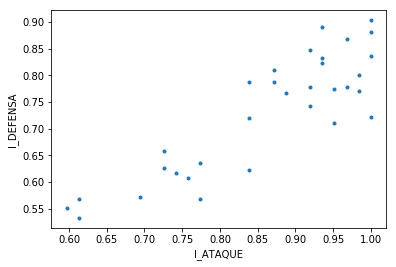

In [348]:
plt.plot(f_norm.I_ATAQUE,f_norm.I_DEFENSA,'.')
plt.xlabel('I_ATAQUE')
plt.ylabel('I_DEFENSA')
plt.show()

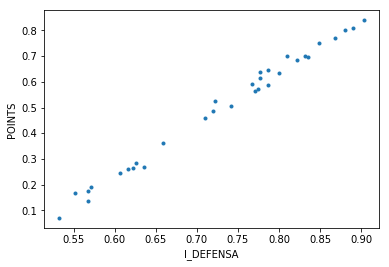

In [353]:
plt.plot(f_norm.I_DEFENSA,f_norm.POINTS,'.')
plt.xlabel('I_DEFENSA')
plt.ylabel('POINTS')
plt.show()

# Evaluación de la probabilidad de triunfo de cada combinación de cartas

Dado que tenemos pocas cartas y solo 5 variables, si una carta es mayor que la otra en las 5, ganará el 100% de las veces. En vez de simular, podemos calcular la probabilidad de triunfo directamente:

In [355]:
def triunfo_empate_derrota(database,card1,card2):
    triunfo = 0
    empate = 0
    derrota = 0
    
    for i in ['ALTURA','PESO','FUERZA','PELEAS','VELOCIDAD']:
        if database.iloc[card1][i] > database.iloc[card2][i]:
            triunfo += 1
        elif database.iloc[card1][i] < database.iloc[card2][i]:    
            derrota += 1
        else:
            empate += 1
    return [triunfo/5.0, empate/5.0, derrota/5.0]

In [390]:
I_TRIUNFO = []
I_EMPATE = []
for i in range(32):
    i_triunfo = 0.0
    i_empate = 0.0
    for j in range(32):
        if i != j:
            t, e, d = triunfo_empate_derrota(f_norm,i,j)
            i_triunfo += t
            i_empate += e
    I_TRIUNFO.append(i_triunfo)
    I_EMPATE.append(i_empate)

I_TRIUNFO = np.array(I_TRIUNFO)/31.0
I_EMPATE = np.array(I_EMPATE)/31.0

f_norm['I_TRIUNFO'] = I_TRIUNFO
f_norm['I_EMPATE'] = I_EMPATE

In [397]:
f_norm

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,...,I_ALTURA,I_PESO,I_FUERZA,I_PELEAS,I_VELOCIDAD,I_MEJOR,I_ATAQUE,I_DEFENSA,I_TRIUNFO,I_EMPATE
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,...,0.822581,0.806452,0.903226,1.000000,0.983871,PELEAS,1.000000,0.903226,0.825806,0.019355
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411,82,...,0.822581,0.822581,0.903226,0.774194,0.919355,VELOCIDAD,0.919355,0.848387,0.735484,0.038710
2,A,3,Aquaman,0.247788,0.028906,0.479167,0.715054,0.204082,1.674996,64,...,0.725806,0.709677,0.822581,0.838710,0.838710,PELEAS,0.838710,0.787097,0.580645,0.006452
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,...,0.919355,0.870968,0.935484,0.870968,0.854839,FUERZA,0.935484,0.890323,0.806452,0.025806
4,B,1,Batman,0.274336,0.031250,0.218750,0.913978,0.122449,1.560764,64,...,0.758065,0.725806,0.693548,0.983871,0.693548,PELEAS,0.983871,0.770968,0.561290,0.019355
5,B,2,Flash,0.221239,0.026562,0.192708,0.688172,1.000000,2.128682,58,...,0.580645,0.612903,0.645161,0.774194,1.000000,VELOCIDAD,1.000000,0.722581,0.496774,0.051613
6,B,3,Flecha Verde,0.274336,0.026562,0.192708,0.774194,0.091837,1.359637,54,...,0.758065,0.612903,0.645161,0.951613,0.580645,PELEAS,0.951613,0.709677,0.451613,0.032258
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019,77,...,0.935484,0.887097,0.887097,0.709677,0.693548,ALTURA,0.935484,0.822581,0.670968,0.025806
8,C,1,Mujer Maravilla,0.265487,0.026562,0.895833,0.892473,0.183673,2.264029,70,...,0.725806,0.612903,0.887097,0.967742,0.693548,PELEAS,0.967742,0.777419,0.606452,0.051613
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,...,0.822581,0.822581,0.838710,0.870968,0.693548,PELEAS,0.870968,0.809677,0.670968,0.051613


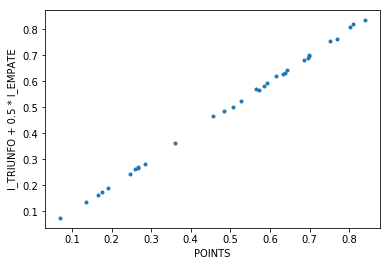

In [394]:
plt.plot(f_norm.POINTS,f_norm.I_TRIUNFO+0.5*f_norm.I_EMPATE,'.')
plt.xlabel('POINTS')
plt.ylabel('I_TRIUNFO + 0.5 * I_EMPATE')
plt.show()

In [396]:
f_norm.sort_values(by = 'I_TRIUNFO',ascending=False)

,LETRA,NUMERO,NOMBRE,ALTURA,PESO,FUERZA,PELEAS,VELOCIDAD,SUMA,RANKING,...,I_ALTURA,I_PESO,I_FUERZA,I_PELEAS,I_VELOCIDAD,I_MEJOR,I_ATAQUE,I_DEFENSA,I_TRIUNFO,I_EMPATE
0,A,1,Superman,0.300885,0.036719,1.000000,1.000000,0.795918,3.133522,90,...,0.822581,0.806452,0.903226,1.000000,0.983871,PELEAS,1.000000,0.903226,0.825806,0.019355
3,A,4,Martian Manhunter,0.407080,0.063281,0.947917,0.741935,0.387755,2.547968,89,...,0.919355,0.870968,0.935484,0.870968,0.854839,FUERZA,0.935484,0.890323,0.806452,0.025806
15,D,4,Darkseid,1.000000,0.601562,1.000000,0.392473,0.387755,3.381791,90,...,1.000000,0.983871,0.903226,0.661290,0.854839,ALTURA,1.000000,0.880645,0.793548,0.032258
14,D,3,Doomsday,0.787611,0.282031,1.000000,0.069892,0.693878,2.833412,81,...,0.967742,0.967742,0.903226,0.532258,0.967742,ALTURA,0.967742,0.867742,0.754839,0.019355
1,A,2,Shazam,0.327434,0.042969,1.000000,0.688172,0.591837,2.650411,82,...,0.822581,0.822581,0.903226,0.774194,0.919355,VELOCIDAD,0.919355,0.848387,0.735484,0.038710
25,G,2,Tornado Rojo,0.283186,0.187500,0.375000,0.705376,0.387755,1.938817,78,...,0.806452,0.935484,0.758065,0.806452,0.854839,PESO,0.935484,0.832258,0.690323,0.025806
31,H,4,Cyborg,0.371681,1.000000,0.322917,0.705376,0.153061,2.553036,81,...,0.870968,1.000000,0.758065,0.806452,0.741935,PESO,1.000000,0.835484,0.683871,0.012903
7,B,4,Lobo,0.415929,0.065625,0.869792,0.500000,0.183673,2.035019,77,...,0.935484,0.887097,0.887097,0.709677,0.693548,ALTURA,0.935484,0.822581,0.670968,0.025806
9,C,2,Hombre Halcon,0.327434,0.046094,0.531250,0.741935,0.183673,1.830386,78,...,0.822581,0.822581,0.838710,0.870968,0.693548,PELEAS,0.870968,0.809677,0.670968,0.051613
21,F,2,Gorilla Grodd,0.823009,0.242188,0.583333,0.259140,0.102041,2.009710,74,...,0.983871,0.951613,0.838710,0.629032,0.596774,ALTURA,0.983871,0.800000,0.619355,0.019355
